Steps: [1, 2, 3, 4, 5, 6, 7, 8]
Y Vals: [ 1  5  3 13  9 16 20 15]
Index: [4, 7]
Peaks: [13.0, 20.0]


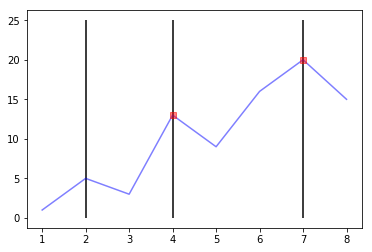

In [104]:
import numpy as np
import Paths as p
import numpy as np
import matplotlib.pyplot as plt
import DetectionEvalSourceCode as det

ymin = 0
ymax = 25
unit  = 1
start_time = 0 
h_length = 256
sr = 22050
hop_duration = h_length / sr
steps = [1, 2, 3, 4, 5, 6, 7, 8]
index = []
peaksClean = []
indexClean = []
trueOnsets = []
start_time = 0

det.peak_picking(unit, start_time, hop_duration)

checkFile = p.get_peaks(unit) + "01_S_0_E_605_detections.npy"
checkFilePeaks = p.get_peaks(unit) + "01_S_0_E_605_peaks.npy"


with open(p.get_data() + str(unit).zfill(2) + "_S_" + str(start_time) + "_E_" + str(start_time+605) + ".txt", "r") as text_file:
    for i in text_file:
        i = i.strip('\n')
        trueOnsets.append(i)




y_vals = np.array([1,5,3,13,9,16,20,15]) #np.load(checkFile)

#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
    
peaks = np.load(checkFilePeaks)

for i in peaks:
    peaksClean.append(i[0])

for i in y_vals:
    if i in peaks:
        #add the index of i to array "Index"
        index.append(np.where(y_vals==i))
        #index = np.where(y_vals==i)

for i in index:
    indexClean.append(steps[i[0][0]])


print("Steps: "+ str(steps))
print("Y Vals: "+ str(y_vals))  
print("Index: "+ str(indexClean))
print("Peaks: "+ str(peaksClean))  

plt.plot(steps,y_vals,'b',indexClean,peaksClean,'rs',alpha=0.5)

for x in trueOnsets:
    x = int(x)
    plt.vlines(x, ymin, ymax, colors='k', linestyles='solid', label='')
    
plt.show()

#plt.plot(index,peaksClean,'rs')
#plt.show()
